In [1]:
import pandas as pd
stock_data=pd.read_csv('NFLX.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-04,359.720001,362.250000,348.040009,351.040009,351.040009,7487000
2019-03-05,351.459991,356.170013,348.250000,354.299988,354.299988,5937800
2019-03-06,353.600006,359.880005,351.700012,359.609985,359.609985,6211900
2019-03-07,360.160004,362.859985,350.500000,352.600006,352.600006,6151300
2019-03-08,345.750000,349.920013,342.470001,349.600006,349.600006,6898800


<function matplotlib.pyplot.show(close=None, block=None)>

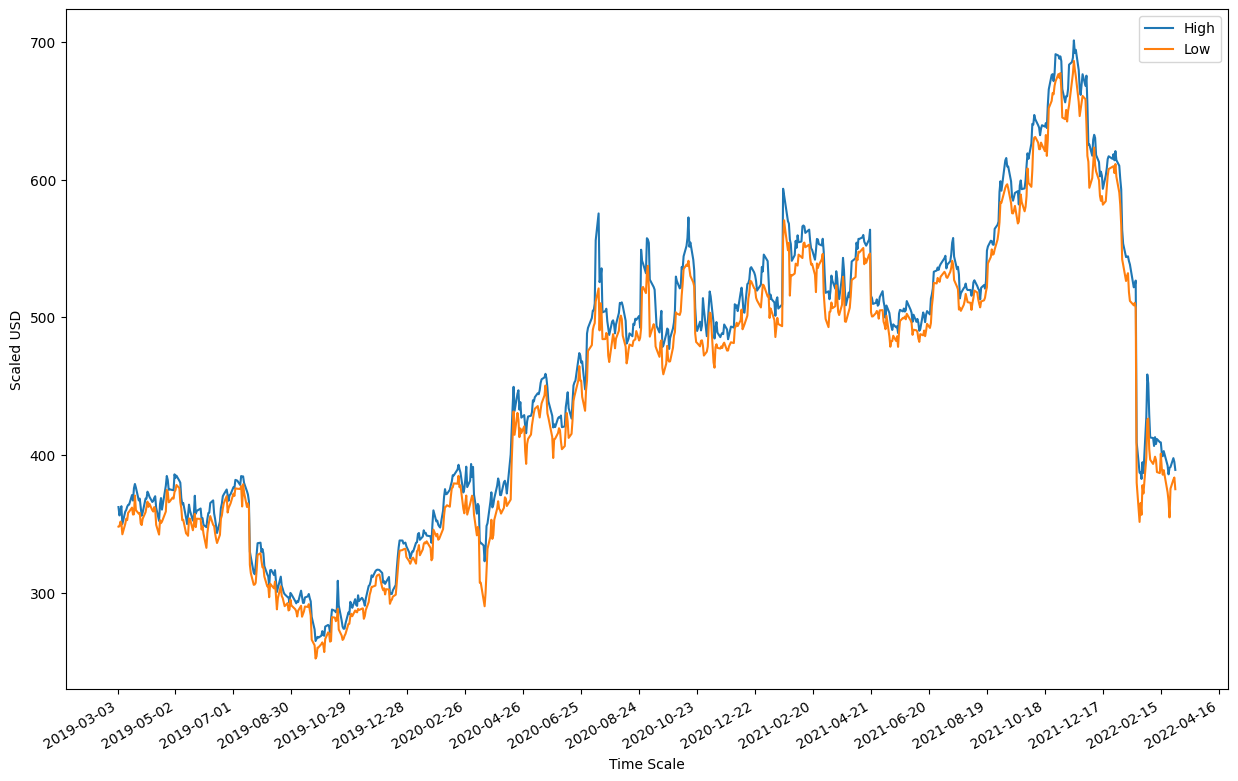

In [5]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]
plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [11]:
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]

In [12]:
#Feature Scaling
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,         
         data=X_ft,
         index=X_feat.index)


In [21]:
def lstm_split(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps + 1):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps - 1, -1])
    return np.array(X), np.array(y)

In [22]:
Xl, yl = lstm_split(X_ft.values, n_steps=2)

# Train-test split
train_split = 0.8
split_idx = int(np.ceil(len(Xl) * train_split))
date_index = X_ft.index

X_train, X_test = Xl[:split_idx], Xl[split_idx:]
y_train, y_test = yl[:split_idx], yl[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(Xl.shape, X_train.shape, X_test.shape, y_test.shape)


(756, 2, 2) (605, 2, 2) (151, 2, 2) (151,)


In [28]:
lstm = Sequential()                                            
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=False))                  
lstm.add(Dense(1))                                                
lstm.compile(loss='mean_squared_error', optimizer='adam')         
lstm.summary()

C:\Users\devsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 32)                  │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,513 (17.63 KB)

 Trainable params: 4,513 (17.63 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=4,
      verbose=2, shuffle=False)

Epoch 1/100
152/152 - 2s - 11ms/step - loss: 0.4009
Epoch 2/100
152/152 - 0s - 2ms/step - loss: 0.0346
Epoch 3/100
152/152 - 0s - 2ms/step - loss: 0.0056
Epoch 4/100
152/152 - 0s - 2ms/step - loss: 0.0052
Epoch 5/100
152/152 - 0s - 2ms/step - loss: 0.0047
Epoch 6/100
152/152 - 0s - 1ms/step - loss: 0.0045
Epoch 7/100
152/152 - 0s - 2ms/step - loss: 0.0044
Epoch 8/100
152/152 - 0s - 2ms/step - loss: 0.0043
Epoch 9/100
152/152 - 0s - 2ms/step - loss: 0.0043
Epoch 10/100
152/152 - 0s - 1ms/step - loss: 0.0043
Epoch 11/100
152/152 - 0s - 2ms/step - loss: 0.0042
Epoch 12/100
152/152 - 0s - 2ms/step - loss: 0.0042
Epoch 13/100
152/152 - 0s - 1ms/step - loss: 0.0042
Epoch 14/100
152/152 - 0s - 2ms/step - loss: 0.0042
Epoch 15/100
152/152 - 0s - 2ms/step - loss: 0.0041
Epoch 16/100
152/152 - 0s - 2ms/step - loss: 0.0041
Epoch 17/100
152/152 - 0s - 2ms/step - loss: 0.0040
Epoch 18/100
152/152 - 0s - 2ms/step - loss: 0.0040
Epoch 19/100
152/152 - 0s - 2ms/step - loss: 0.0040
Epoch 20/100
152/152

In [30]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


RSME:  0.09109060061934382
MAPE:  0.05924954864287911
Accuracy:  94.07504513571209


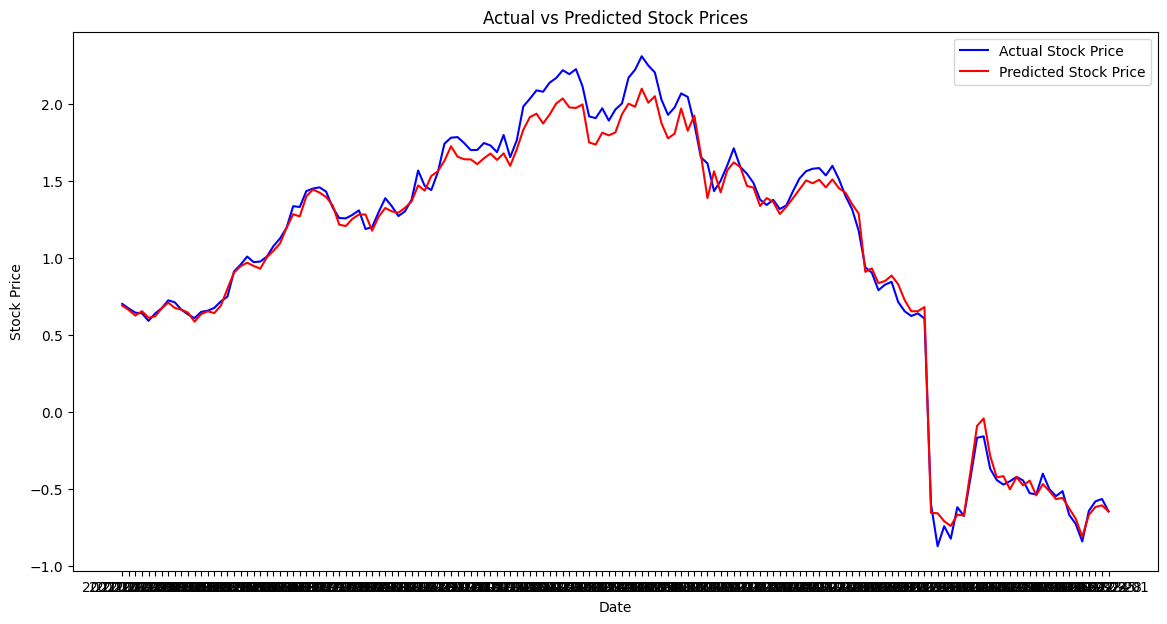

In [37]:
# Adjust the lengths to match
X_test_date = X_test_date[:len(y_pred)]
y_test = y_test[:len(y_pred)]

#rmse and mape errors
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
mape_percentage = mape * 100
accuracy = 100 - mape_percentage
print("RSME: ",rmse)
print("MAPE: ", mape)
print("Accuracy: ", accuracy)

# Plot the actual vs predicted stock prices
plt.figure(figsize=(14,7))
plt.plot(X_test_date, y_test, color='blue', label='Actual Stock Price')
plt.plot(X_test_date, y_pred, color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()